<a href="https://colab.research.google.com/github/sthitaprajnadas/gcp-aiml-works/blob/main/quiz_marks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv("./marks_final.csv")


In [13]:
df.head()

,SNO.,ROLL NUMBER,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5),Top 9 (out of 45),Out of 30,total_score
0,1,102003733,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,4.0,12,8.0,12.0
1,2,102203002,5.0,NaN,4.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,40,26.7,46.0
2,3,102203003,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,4.0,2.0,39,26.0,48.0
3,4,102203005,NaN,NaN,NaN,NaN,3.0,5.0,3.0,4.0,4.0,5.0,5.0,NaN,29,19.3,29.0
4,5,102203007,NaN,NaN,NaN,5.0,4.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,36,24.0,36.0


In [10]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
df.replace(to_replace=r"(?i)^AB$" , regex=True , inplace=True , value=np.nan)

quiz_cols = [col for col in df.columns if 'Quiz' in col or 'Q' in col]

for col in quiz_cols:
  df[col] = pd.to_numeric(df[col], errors = "coerce")

df[quiz_cols].head()



,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5)
0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,4.0
1,5.0,NaN,4.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0
2,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,4.0,2.0
3,NaN,NaN,NaN,NaN,3.0,5.0,3.0,4.0,4.0,5.0,5.0,NaN
4,NaN,NaN,NaN,5.0,4.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0


In [16]:
df["total_score"] = df[quiz_cols].sum(axis=1,skipna=True)

df["percentage"] = (df["total_score"] / (len(quiz_cols) * 10) ) * 100

df.head()


,SNO.,ROLL NUMBER,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5),Top 9 (out of 45),Out of 30,total_score,percentage
0,1,102003733,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,4.0,12,8.0,12.0,10.000000
1,2,102203002,5.0,NaN,4.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,40,26.7,46.0,38.333333
2,3,102203003,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,4.0,2.0,39,26.0,48.0,40.000000
3,4,102203005,NaN,NaN,NaN,NaN,3.0,5.0,3.0,4.0,4.0,5.0,5.0,NaN,29,19.3,29.0,24.166667
4,5,102203007,NaN,NaN,NaN,5.0,4.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,36,24.0,36.0,30.000000


In [18]:
df[quiz_cols + ["total_score" , "percentage"]].describe()

,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5),total_score,percentage
count,891.000000,910.000000,933.000000,931.000000,932.000000,956.000000,928.000000,935.000000,946.00000,941.000000,937.000000,940.000000,1053.000000,1053.000000
mean,4.414141,3.452747,4.099678,4.322234,3.268240,4.165272,3.602371,4.003209,4.61945,4.755579,4.519744,4.087234,43.646724,36.372270
std,0.914417,1.182690,0.870184,0.849623,1.108962,0.905993,0.989849,0.831004,0.68930,0.590513,0.658512,1.120459,9.769520,8.141267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.00000,5.000000,4.000000,3.000000,40.000000,33.333333
50%,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,46.000000,38.333333
75%,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.00000,5.000000,5.000000,5.000000,50.000000,41.666667
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,57.000000,47.500000


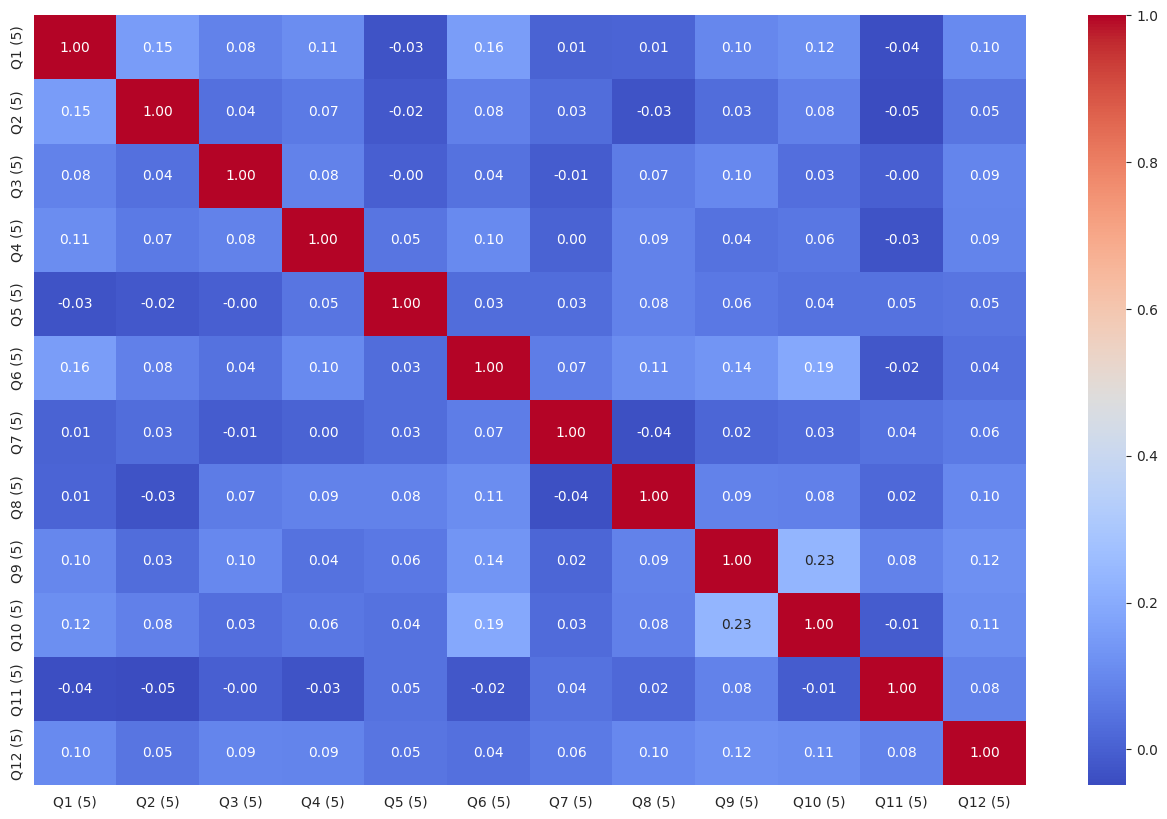

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(df[quiz_cols].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [25]:
df.head()

,SNO.,ROLL NUMBER,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5),Top 9 (out of 45),Out of 30,total_score,percentage
0,1,102003733,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,4.0,12,8.0,12.0,10.000000
1,2,102203002,5.0,NaN,4.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,40,26.7,46.0,38.333333
2,3,102203003,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,4.0,2.0,39,26.0,48.0,40.000000
3,4,102203005,NaN,NaN,NaN,NaN,3.0,5.0,3.0,4.0,4.0,5.0,5.0,NaN,29,19.3,29.0,24.166667
4,5,102203007,NaN,NaN,NaN,5.0,4.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,36,24.0,36.0,30.000000


In [27]:
df.nlargest(5,"Top 9 (out of 45)")[["SNO.","ROLL NUMBER", "total_score", "percentage","Top 9 (out of 45)"]]

,SNO.,ROLL NUMBER,total_score,percentage,Top 9 (out of 45)
41,42,102203063,56.0,46.666667,45
45,46,102203067,53.0,44.166667,45
62,63,102203099,54.0,45.000000,45
87,88,102203151,57.0,47.500000,45
89,90,102203155,54.0,45.000000,45


In [29]:
df.nsmallest(5,"Top 9 (out of 45)")[["SNO.","ROLL NUMBER", "total_score", "percentage","Top 9 (out of 45)"]]

,SNO.,ROLL NUMBER,total_score,percentage,Top 9 (out of 45)
13,14,102203022,0.0,0.0,0
128,129,102203530,0.0,0.0,0
166,167,102203233,0.0,0.0,0
195,196,102203278,0.0,0.0,0
212,213,102203308,0.0,0.0,0


<Axes: title={'center': 'boxplot of quiz scores'}>

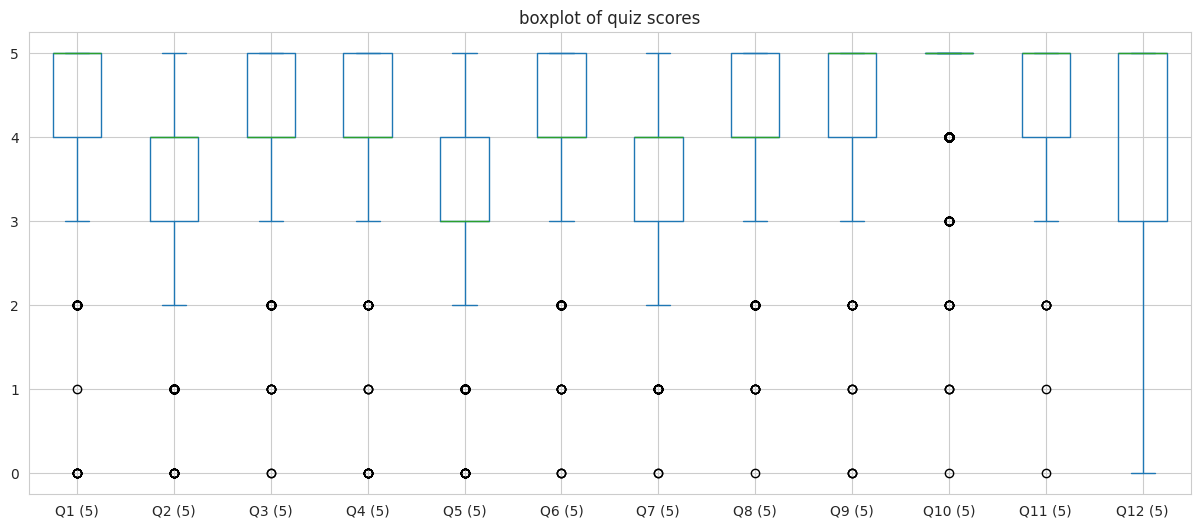

In [31]:
df[quiz_cols].plot(kind="box",figsize=(15,6),title="boxplot of quiz scores")

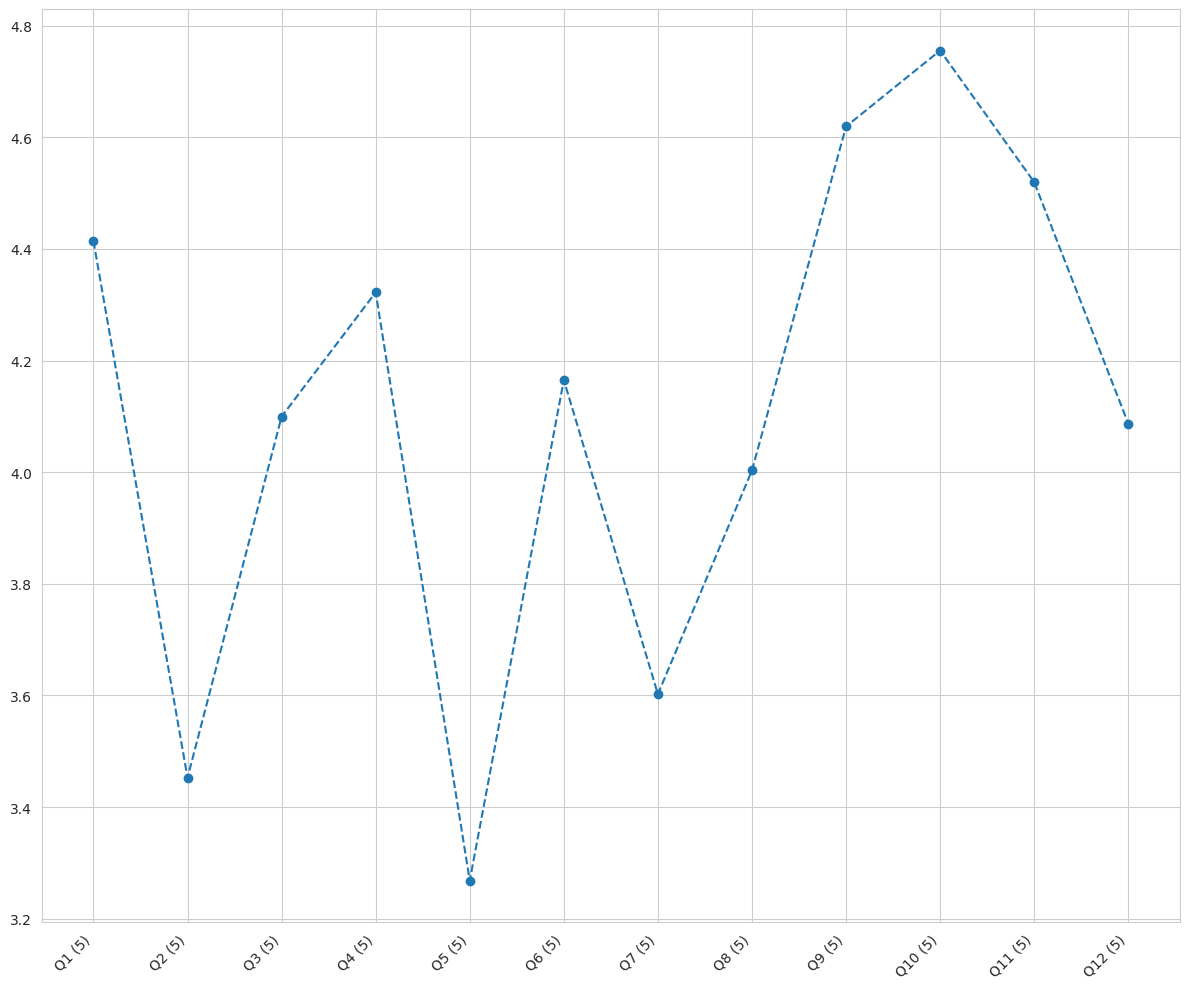

In [50]:
quiz_avgs = df[quiz_cols].mean()
plt.figure(figsize =(12,10))

plt.plot(quiz_avgs.index,quiz_avgs.values,marker='o',linestyle="--")
plt.xticks(rotation=45, ha='right')
#plt.grid(True)
plt.tight_layout()

plt.show()

